In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.gru(x, hidden)
        output = self.fc(output)
        return output, hidden

x size (1, 256)
t size (1, 100)
u size (256, 100)


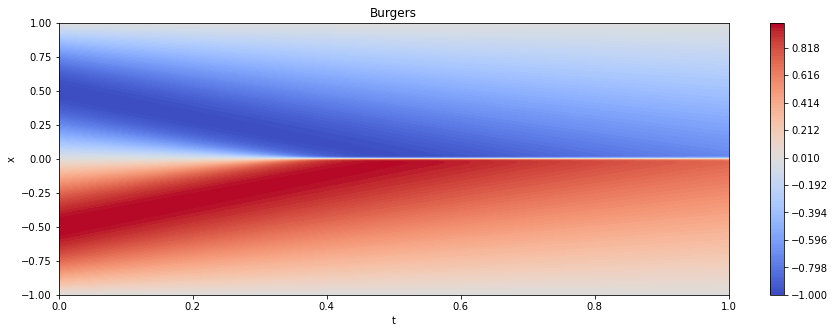

In [3]:
# importing data

# Load the .mat file
mat_data = scipy.io.loadmat('burg.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

#Use the loaded variables as needed
print("x size", x.shape)
print("t size", t.shape)
print("u size", u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [4]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 20000

# Set random seed for reproducibility
torch.manual_seed(42)

In [5]:
input_data = u[:,0:79]
target_data = u[:,1:80]

test_data = u[:,79]
test_target = u[:,80:100]

print("test data shape", test_data.shape)
print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

test data shape (256,)
test target shape (256, 20)
input data shape (256, 79)
Target data shape (256, 79)
input tensor shape torch.Size([1, 79, 256])
Target tensor shape torch.Size([1, 79, 256])


In [6]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()

In [7]:
# Create GRU instance
gru = GRU(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = gru(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')


Epoch: 10/20000, Loss: 0.04728378
Epoch: 20/20000, Loss: 0.03538800
Epoch: 30/20000, Loss: 0.01981042
Epoch: 40/20000, Loss: 0.01040103
Epoch: 50/20000, Loss: 0.00527054
Epoch: 60/20000, Loss: 0.00318479
Epoch: 70/20000, Loss: 0.00244968
Epoch: 80/20000, Loss: 0.00209959
Epoch: 90/20000, Loss: 0.00188487
Epoch: 100/20000, Loss: 0.00172498
Epoch: 110/20000, Loss: 0.00159098
Epoch: 120/20000, Loss: 0.00147008
Epoch: 130/20000, Loss: 0.00135938
Epoch: 140/20000, Loss: 0.00125891
Epoch: 150/20000, Loss: 0.00116816
Epoch: 160/20000, Loss: 0.00159141
Epoch: 170/20000, Loss: 0.00109952
Epoch: 180/20000, Loss: 0.00101929
Epoch: 190/20000, Loss: 0.00091804
Epoch: 200/20000, Loss: 0.00085555
Epoch: 210/20000, Loss: 0.00079142
Epoch: 220/20000, Loss: 0.00073952
Epoch: 230/20000, Loss: 0.00069706
Epoch: 240/20000, Loss: 0.00065802
Epoch: 250/20000, Loss: 0.00062206
Epoch: 260/20000, Loss: 0.00058831
Epoch: 270/20000, Loss: 0.00055650
Epoch: 280/20000, Loss: 0.00052637
Epoch: 290/20000, Loss: 0.000

Epoch: 2330/20000, Loss: 0.00015680
Epoch: 2340/20000, Loss: 0.00002256
Epoch: 2350/20000, Loss: 0.00002917
Epoch: 2360/20000, Loss: 0.00001790
Epoch: 2370/20000, Loss: 0.00002162
Epoch: 2380/20000, Loss: 0.00008417
Epoch: 2390/20000, Loss: 0.00001587
Epoch: 2400/20000, Loss: 0.00002302
Epoch: 2410/20000, Loss: 0.00001903
Epoch: 2420/20000, Loss: 0.00001542
Epoch: 2430/20000, Loss: 0.00001447
Epoch: 2440/20000, Loss: 0.00001441
Epoch: 2450/20000, Loss: 0.00001377
Epoch: 2460/20000, Loss: 0.00001418
Epoch: 2470/20000, Loss: 0.00003514
Epoch: 2480/20000, Loss: 0.00016184
Epoch: 2490/20000, Loss: 0.00001569
Epoch: 2500/20000, Loss: 0.00003377
Epoch: 2510/20000, Loss: 0.00001706
Epoch: 2520/20000, Loss: 0.00001675
Epoch: 2530/20000, Loss: 0.00001401
Epoch: 2540/20000, Loss: 0.00001310
Epoch: 2550/20000, Loss: 0.00001301
Epoch: 2560/20000, Loss: 0.00001286
Epoch: 2570/20000, Loss: 0.00001279
Epoch: 2580/20000, Loss: 0.00001298
Epoch: 2590/20000, Loss: 0.00002576
Epoch: 2600/20000, Loss: 0.0

Epoch: 4620/20000, Loss: 0.00002409
Epoch: 4630/20000, Loss: 0.00000841
Epoch: 4640/20000, Loss: 0.00000462
Epoch: 4650/20000, Loss: 0.00000645
Epoch: 4660/20000, Loss: 0.00005495
Epoch: 4670/20000, Loss: 0.00002271
Epoch: 4680/20000, Loss: 0.00003102
Epoch: 4690/20000, Loss: 0.00001214
Epoch: 4700/20000, Loss: 0.00000919
Epoch: 4710/20000, Loss: 0.00001255
Epoch: 4720/20000, Loss: 0.00002357
Epoch: 4730/20000, Loss: 0.00006819
Epoch: 4740/20000, Loss: 0.00000379
Epoch: 4750/20000, Loss: 0.00001650
Epoch: 4760/20000, Loss: 0.00000668
Epoch: 4770/20000, Loss: 0.00000388
Epoch: 4780/20000, Loss: 0.00000390
Epoch: 4790/20000, Loss: 0.00001052
Epoch: 4800/20000, Loss: 0.00022021
Epoch: 4810/20000, Loss: 0.00013571
Epoch: 4820/20000, Loss: 0.00004957
Epoch: 4830/20000, Loss: 0.00001303
Epoch: 4840/20000, Loss: 0.00001057
Epoch: 4850/20000, Loss: 0.00000775
Epoch: 4860/20000, Loss: 0.00000555
Epoch: 4870/20000, Loss: 0.00000409
Epoch: 4880/20000, Loss: 0.00000372
Epoch: 4890/20000, Loss: 0.0

Epoch: 6910/20000, Loss: 0.00002069
Epoch: 6920/20000, Loss: 0.00006414
Epoch: 6930/20000, Loss: 0.00000842
Epoch: 6940/20000, Loss: 0.00001977
Epoch: 6950/20000, Loss: 0.00000535
Epoch: 6960/20000, Loss: 0.00000429
Epoch: 6970/20000, Loss: 0.00000836
Epoch: 6980/20000, Loss: 0.00002950
Epoch: 6990/20000, Loss: 0.00005390
Epoch: 7000/20000, Loss: 0.00005338
Epoch: 7010/20000, Loss: 0.00001713
Epoch: 7020/20000, Loss: 0.00000265
Epoch: 7030/20000, Loss: 0.00000783
Epoch: 7040/20000, Loss: 0.00000678
Epoch: 7050/20000, Loss: 0.00000662
Epoch: 7060/20000, Loss: 0.00002158
Epoch: 7070/20000, Loss: 0.00004565
Epoch: 7080/20000, Loss: 0.00000213
Epoch: 7090/20000, Loss: 0.00001275
Epoch: 7100/20000, Loss: 0.00002262
Epoch: 7110/20000, Loss: 0.00001832
Epoch: 7120/20000, Loss: 0.00000976
Epoch: 7130/20000, Loss: 0.00001441
Epoch: 7140/20000, Loss: 0.00004196
Epoch: 7150/20000, Loss: 0.00004719
Epoch: 7160/20000, Loss: 0.00002480
Epoch: 7170/20000, Loss: 0.00001079
Epoch: 7180/20000, Loss: 0.0

Epoch: 9200/20000, Loss: 0.00002316
Epoch: 9210/20000, Loss: 0.00003118
Epoch: 9220/20000, Loss: 0.00003729
Epoch: 9230/20000, Loss: 0.00000813
Epoch: 9240/20000, Loss: 0.00000889
Epoch: 9250/20000, Loss: 0.00000371
Epoch: 9260/20000, Loss: 0.00000567
Epoch: 9270/20000, Loss: 0.00001470
Epoch: 9280/20000, Loss: 0.00002403
Epoch: 9290/20000, Loss: 0.00015375
Epoch: 9300/20000, Loss: 0.00003602
Epoch: 9310/20000, Loss: 0.00001872
Epoch: 9320/20000, Loss: 0.00000895
Epoch: 9330/20000, Loss: 0.00000393
Epoch: 9340/20000, Loss: 0.00000094
Epoch: 9350/20000, Loss: 0.00000151
Epoch: 9360/20000, Loss: 0.00000167
Epoch: 9370/20000, Loss: 0.00000687
Epoch: 9380/20000, Loss: 0.00006706
Epoch: 9390/20000, Loss: 0.00000894
Epoch: 9400/20000, Loss: 0.00000848
Epoch: 9410/20000, Loss: 0.00000575
Epoch: 9420/20000, Loss: 0.00000313
Epoch: 9430/20000, Loss: 0.00000118
Epoch: 9440/20000, Loss: 0.00001116
Epoch: 9450/20000, Loss: 0.00018598
Epoch: 9460/20000, Loss: 0.00006855
Epoch: 9470/20000, Loss: 0.0

Epoch: 11450/20000, Loss: 0.00000494
Epoch: 11460/20000, Loss: 0.00000481
Epoch: 11470/20000, Loss: 0.00000493
Epoch: 11480/20000, Loss: 0.00000497
Epoch: 11490/20000, Loss: 0.00000491
Epoch: 11500/20000, Loss: 0.00000466
Epoch: 11510/20000, Loss: 0.00000515
Epoch: 11520/20000, Loss: 0.00000703
Epoch: 11530/20000, Loss: 0.00000897
Epoch: 11540/20000, Loss: 0.00000452
Epoch: 11550/20000, Loss: 0.00000552
Epoch: 11560/20000, Loss: 0.00000944
Epoch: 11570/20000, Loss: 0.00004683
Epoch: 11580/20000, Loss: 0.00000939
Epoch: 11590/20000, Loss: 0.00001654
Epoch: 11600/20000, Loss: 0.00000836
Epoch: 11610/20000, Loss: 0.00000687
Epoch: 11620/20000, Loss: 0.00000448
Epoch: 11630/20000, Loss: 0.00000432
Epoch: 11640/20000, Loss: 0.00001321
Epoch: 11650/20000, Loss: 0.00018340
Epoch: 11660/20000, Loss: 0.00003683
Epoch: 11670/20000, Loss: 0.00000478
Epoch: 11680/20000, Loss: 0.00000970
Epoch: 11690/20000, Loss: 0.00000709
Epoch: 11700/20000, Loss: 0.00000527
Epoch: 11710/20000, Loss: 0.00000453
E

Epoch: 13670/20000, Loss: 0.00000327
Epoch: 13680/20000, Loss: 0.00002131
Epoch: 13690/20000, Loss: 0.00004128
Epoch: 13700/20000, Loss: 0.00002335
Epoch: 13710/20000, Loss: 0.00002387
Epoch: 13720/20000, Loss: 0.00001679
Epoch: 13730/20000, Loss: 0.00000386
Epoch: 13740/20000, Loss: 0.00001010
Epoch: 13750/20000, Loss: 0.00005024
Epoch: 13760/20000, Loss: 0.00000920
Epoch: 13770/20000, Loss: 0.00001406
Epoch: 13780/20000, Loss: 0.00001067
Epoch: 13790/20000, Loss: 0.00000347
Epoch: 13800/20000, Loss: 0.00000365
Epoch: 13810/20000, Loss: 0.00006154
Epoch: 13820/20000, Loss: 0.00006280
Epoch: 13830/20000, Loss: 0.00005379
Epoch: 13840/20000, Loss: 0.00000816
Epoch: 13850/20000, Loss: 0.00000996
Epoch: 13860/20000, Loss: 0.00000403
Epoch: 13870/20000, Loss: 0.00000840
Epoch: 13880/20000, Loss: 0.00001447
Epoch: 13890/20000, Loss: 0.00004307
Epoch: 13900/20000, Loss: 0.00000478
Epoch: 13910/20000, Loss: 0.00001549
Epoch: 13920/20000, Loss: 0.00000866
Epoch: 13930/20000, Loss: 0.00000417
E

Epoch: 15890/20000, Loss: 0.00004304
Epoch: 15900/20000, Loss: 0.00000966
Epoch: 15910/20000, Loss: 0.00003213
Epoch: 15920/20000, Loss: 0.00002172
Epoch: 15930/20000, Loss: 0.00001092
Epoch: 15940/20000, Loss: 0.00000756
Epoch: 15950/20000, Loss: 0.00000206
Epoch: 15960/20000, Loss: 0.00000168
Epoch: 15970/20000, Loss: 0.00000152
Epoch: 15980/20000, Loss: 0.00000906
Epoch: 15990/20000, Loss: 0.00021574
Epoch: 16000/20000, Loss: 0.00009271
Epoch: 16010/20000, Loss: 0.00000636
Epoch: 16020/20000, Loss: 0.00001245
Epoch: 16030/20000, Loss: 0.00000706
Epoch: 16040/20000, Loss: 0.00000219
Epoch: 16050/20000, Loss: 0.00000152
Epoch: 16060/20000, Loss: 0.00000144
Epoch: 16070/20000, Loss: 0.00000178
Epoch: 16080/20000, Loss: 0.00000167
Epoch: 16090/20000, Loss: 0.00000146
Epoch: 16100/20000, Loss: 0.00000222
Epoch: 16110/20000, Loss: 0.00001866
Epoch: 16120/20000, Loss: 0.00003557
Epoch: 16130/20000, Loss: 0.00001662
Epoch: 16140/20000, Loss: 0.00001355
Epoch: 16150/20000, Loss: 0.00000910
E

Epoch: 18110/20000, Loss: 0.00000598
Epoch: 18120/20000, Loss: 0.00002724
Epoch: 18130/20000, Loss: 0.00004093
Epoch: 18140/20000, Loss: 0.00000776
Epoch: 18150/20000, Loss: 0.00000637
Epoch: 18160/20000, Loss: 0.00000523
Epoch: 18170/20000, Loss: 0.00001085
Epoch: 18180/20000, Loss: 0.00002748
Epoch: 18190/20000, Loss: 0.00004680
Epoch: 18200/20000, Loss: 0.00000531
Epoch: 18210/20000, Loss: 0.00000958
Epoch: 18220/20000, Loss: 0.00000212
Epoch: 18230/20000, Loss: 0.00000319
Epoch: 18240/20000, Loss: 0.00000980
Epoch: 18250/20000, Loss: 0.00008768
Epoch: 18260/20000, Loss: 0.00002805
Epoch: 18270/20000, Loss: 0.00001320
Epoch: 18280/20000, Loss: 0.00000988
Epoch: 18290/20000, Loss: 0.00001372
Epoch: 18300/20000, Loss: 0.00004272
Epoch: 18310/20000, Loss: 0.00000324
Epoch: 18320/20000, Loss: 0.00000651
Epoch: 18330/20000, Loss: 0.00000310
Epoch: 18340/20000, Loss: 0.00000242
Epoch: 18350/20000, Loss: 0.00000481
Epoch: 18360/20000, Loss: 0.00005671
Epoch: 18370/20000, Loss: 0.00001171
E

In [8]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 20, 256])


In [9]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = gru(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = gru(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

### Four different types of error

In [10]:
# Exact Solution
u_1 = u
u_test = u_1.T
u_test_full = u_test[80:100, :]

In [11]:
prediction_tensor = torch.squeeze(prediction_tensor)

In [12]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
u_test_full_tensor.shape

torch.Size([20, 256])

### L^2 norm error

In [13]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.39502675058540704 %


### Max absolute norm error

In [14]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))

In [15]:
print(R_abs)

tensor(0.5465, dtype=torch.float64)


### Explained variance score

In [16]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
# a = torch.tensor(a)
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

Explained Variance Score: 0.604973257268674


### Mean absolute error

In [17]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")

Relative Error Test:  tensor(0.2579, dtype=torch.float64) %


### Contour plot for PINN (80 percent) and (20 percentage lem prediction)

In [18]:
print(prediction_tensor.shape)
prediction_tensor = torch.squeeze(prediction_tensor)
input_tensor = torch.squeeze(input_tensor)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

x1 = np.linspace(-1, 1, 256)
t1 = np.linspace(0, 1, 99)

torch.Size([20, 256])


### Snapshot time plots

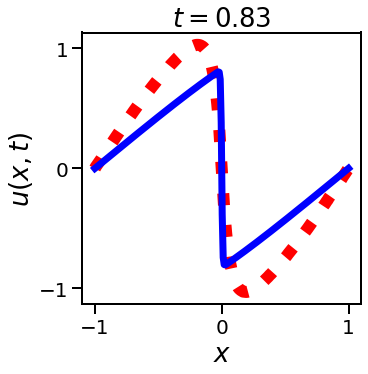

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed




final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_1[:, 83].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.83_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()

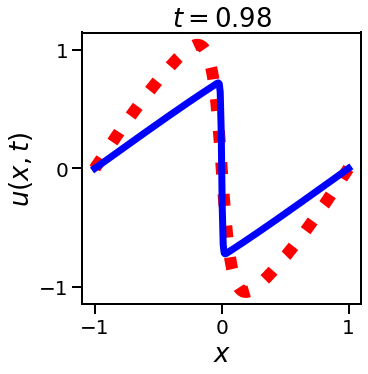

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_1[:, -2].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('GRU_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


### Contour plot where 80 percent for PINN solution and 20 percent for GRU solution

### Exact contour

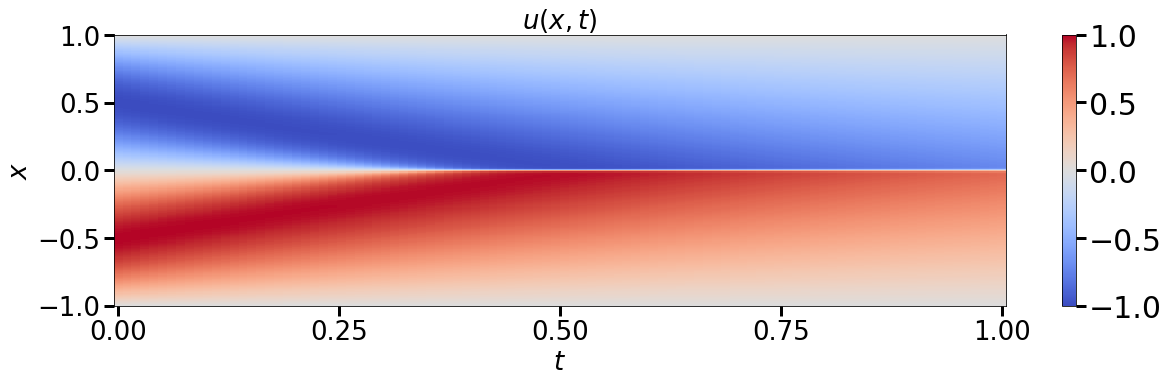

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = u_1.T

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

#plt.savefig('Contour_Exact.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_exact.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


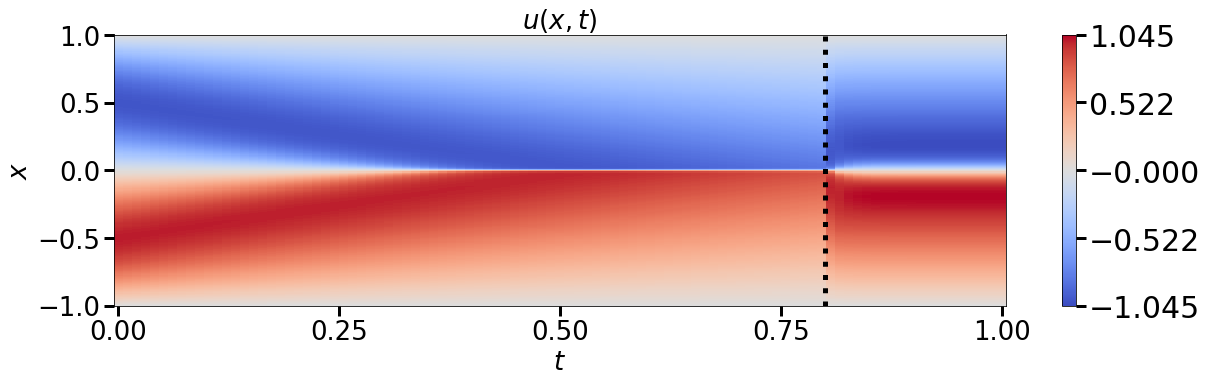

In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-1, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='coolwarm')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_GRU_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
